In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold,train_test_split,cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import time

In [61]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
data=pd.read_csv(r"/content/drive/MyDrive/Dry_Bean_Dataset.csv")

In [63]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [64]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [66]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

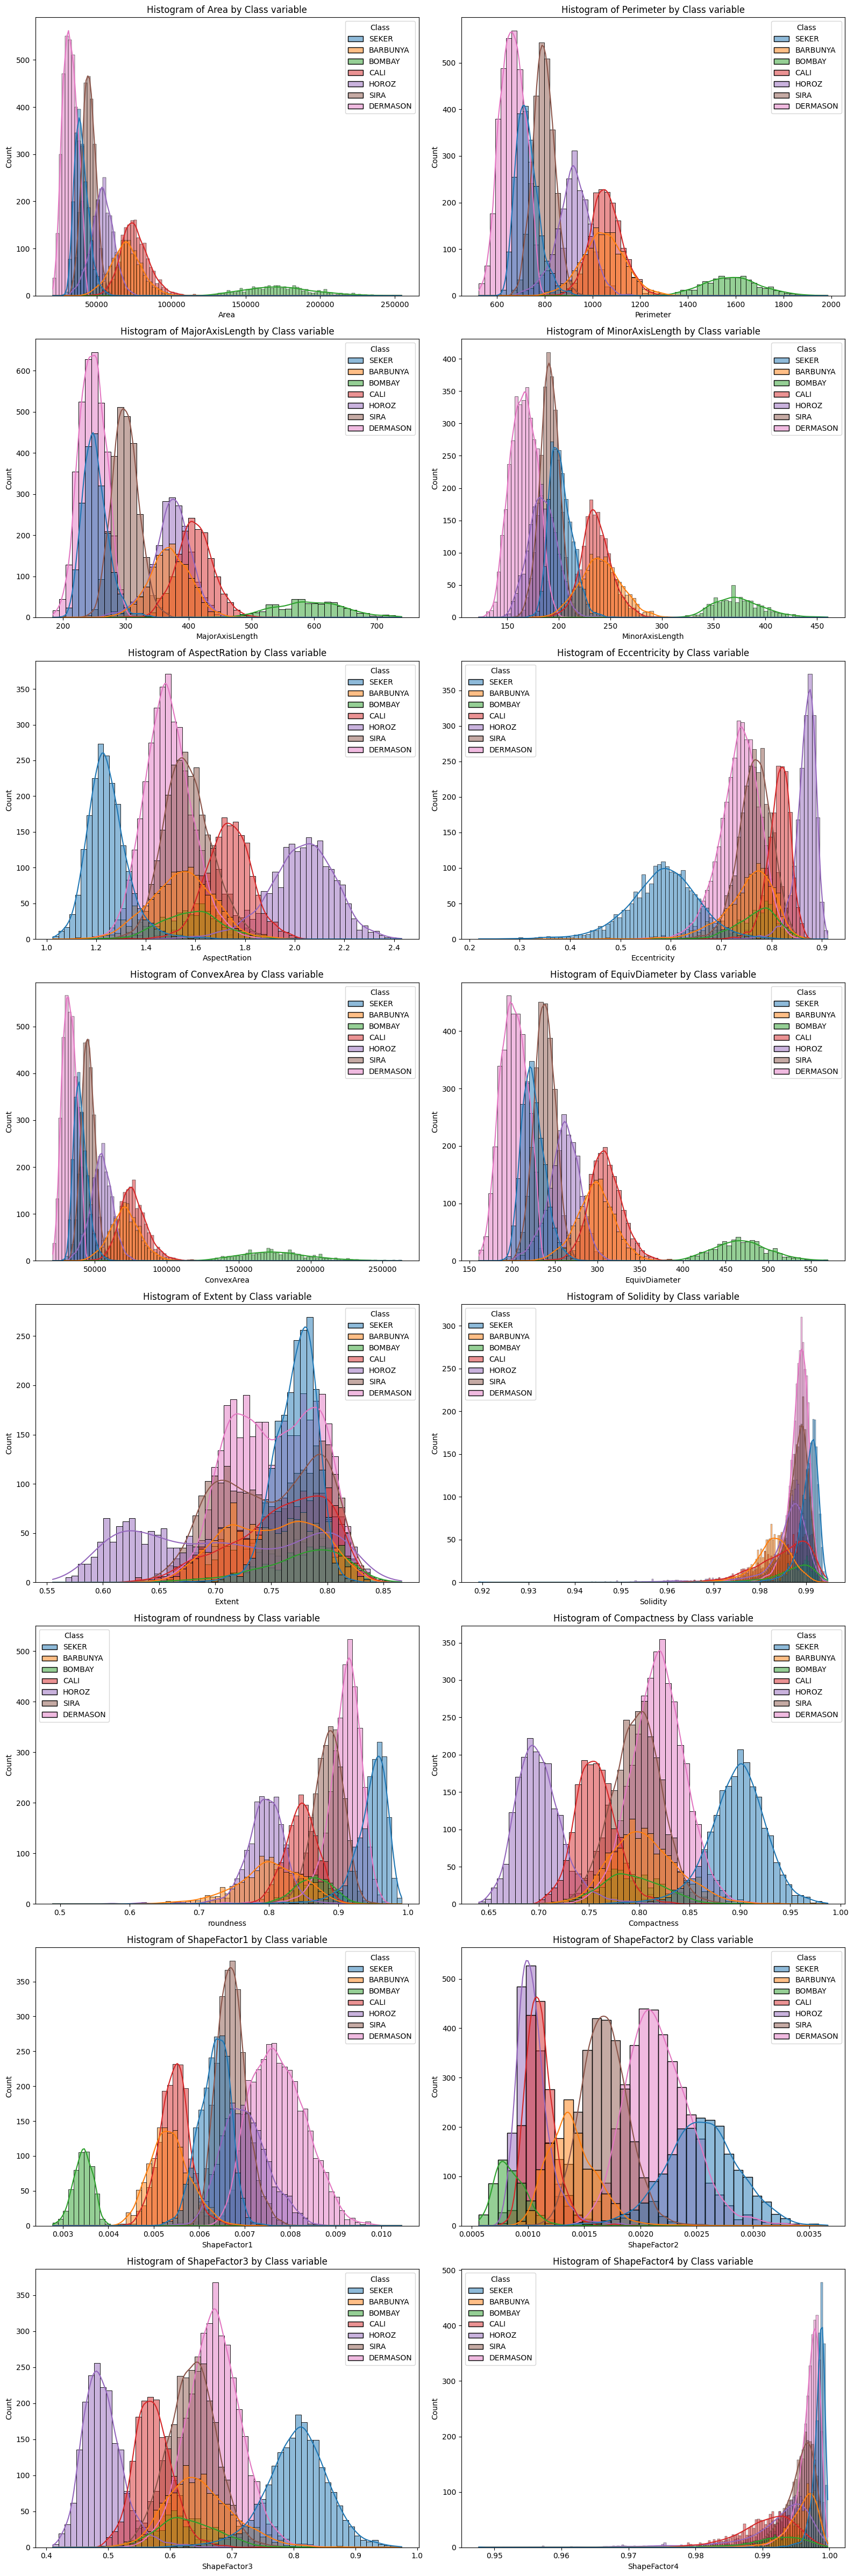

In [67]:
numerical_columns=data.columns[data.columns != 'Class']
num_plots=len(numerical_columns)
num_rows=(num_plots+1)//2
fig,axes=plt.subplots(num_rows,2,figsize=(16,6*num_rows))
if num_rows==1:
    axes=axes.reshape(1,-1)
for i,column in enumerate(numerical_columns):
    row_index=i//2
    col_index=i%2
    sns.histplot(data=data,x=column,hue='Class',kde=True,ax=axes[row_index,col_index])
    axes[row_index,col_index].set_title(f'Histogram of {column} by Class variable')

for i in range(num_plots,num_rows*2):
    axis[i//2,i%2].axis('off')
plt.tight_layout()
plt.show()

In [68]:
fv=data.iloc[:,:16]
cv=data.iloc[:,-1]

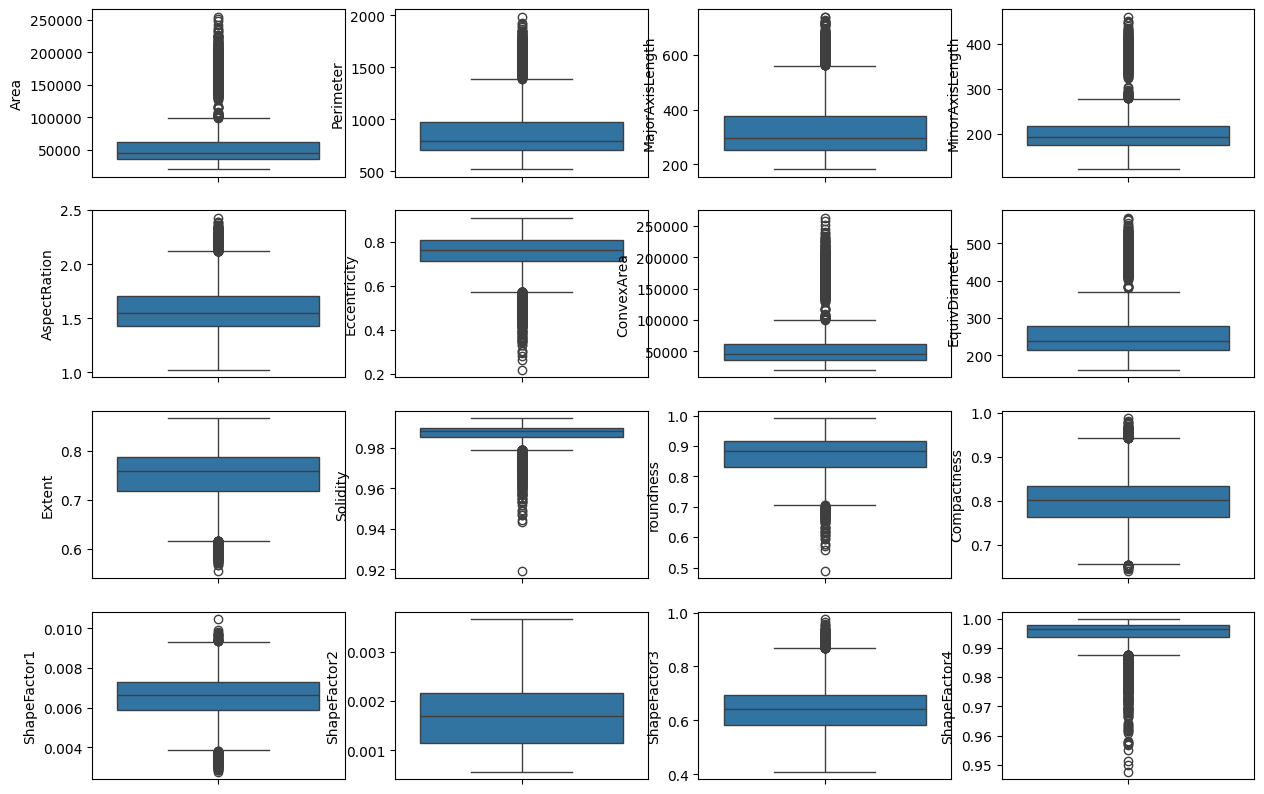

In [69]:
plt.figure(figsize=(15,10))
for i,column in enumerate(fv.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(fv[column])
plt.show()

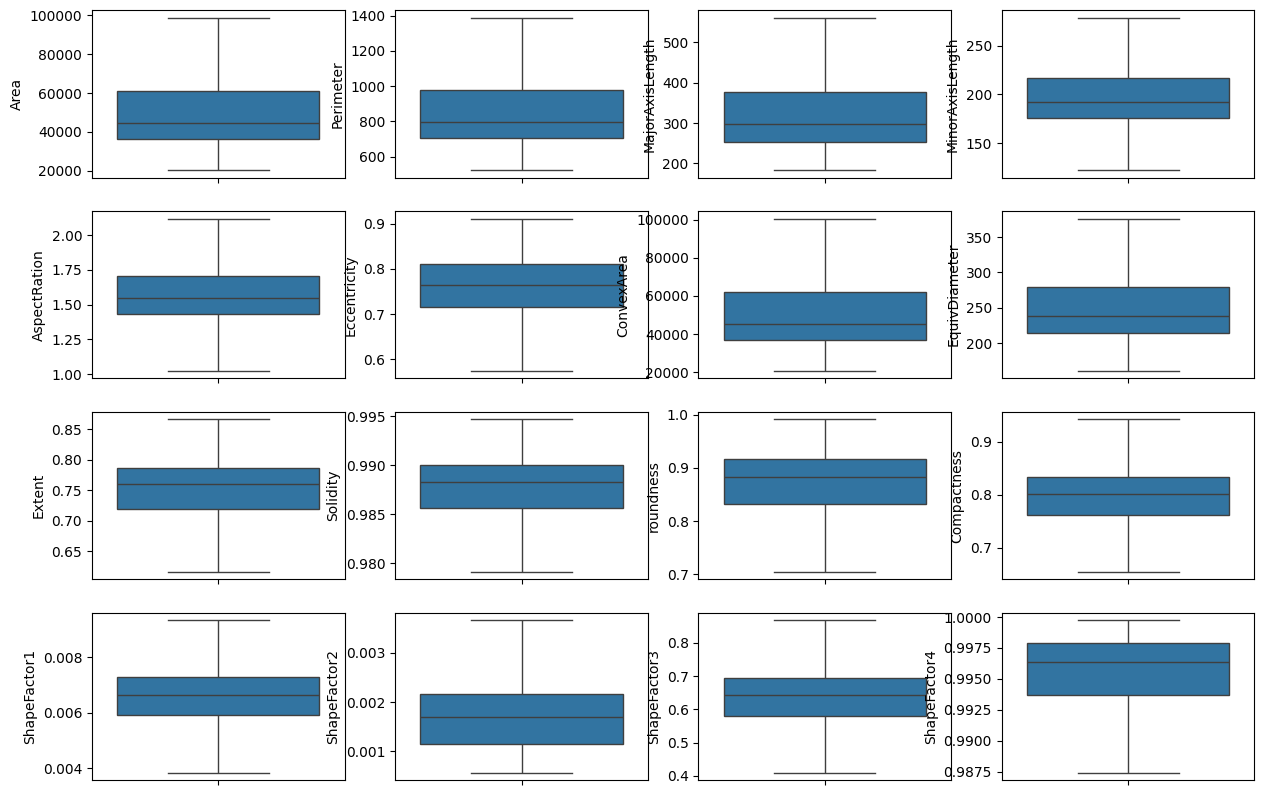

In [70]:
## remove outliers using IQR method:-
plt.figure(figsize=(15,10))
for i,column in enumerate(fv.columns):
    IQR=fv[column].quantile(0.75)-fv[column].quantile(0.25)
    upper_limit=fv[column].quantile(0.75)+1.5*IQR
    lower_limit=fv[column].quantile(0.25)-1.5*IQR
    fv[column]=np.clip(fv[column],upper_limit,lower_limit)
    plt.subplot(4,4,i+1)
    sns.boxplot(fv[column])
plt.show()

In [71]:
del fv['Extent']
del fv['Solidity']
del fv['ShapeFactor4']
del fv['roundness']
del fv['Compactness']

In [72]:
fv

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,ShapeFactor1,ShapeFactor2,ShapeFactor3
0,28395,610.291,208.178117,173.888747,1.197191,0.574120,28715.0,190.141097,0.007332,0.003147,0.834222
1,28734,638.018,200.524796,182.734419,1.097356,0.574120,29172.0,191.272751,0.006979,0.003564,0.867978
2,29380,624.110,212.826130,175.931143,1.209713,0.574120,29690.0,193.410904,0.007244,0.003048,0.825871
3,30008,645.884,210.557999,182.516516,1.153638,0.574120,30724.0,195.467062,0.007017,0.003215,0.861794
4,30140,620.134,201.847882,190.279279,1.060798,0.574120,30417.0,195.896503,0.006697,0.003665,0.867978
...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.006858,0.001749,0.642988
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.006688,0.001886,0.676099
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.006681,0.001888,0.676884
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653247,0.006724,0.001852,0.668237


In [73]:
## divide the feature varibles into Training and Test Data:-
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1,stratify=cv)

In [74]:
x_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,ShapeFactor1,ShapeFactor2,ShapeFactor3
7926,40674,748.346,275.777468,188.399378,1.463792,0.730271,41111.0,227.569210,0.006780,0.001939,0.680941
13111,37783,725.097,276.567189,174.202492,1.587619,0.776697,38182.0,219.332646,0.007320,0.001786,0.628934
8063,41489,797.126,307.077572,173.107997,1.773907,0.825961,42189.0,229.837846,0.007401,0.001433,0.560205
1125,39859,724.609,255.684610,198.752850,1.286445,0.629086,40202.0,225.277729,0.006415,0.002385,0.776296
803,38145,762.943,256.113302,190.105434,1.347217,0.670100,38876.0,220.380858,0.006714,0.002271,0.740429
...,...,...,...,...,...,...,...,...,...,...,...
13531,41221,752.069,280.157423,187.594468,1.493420,0.742719,41590.0,229.094320,0.006796,0.001875,0.668689
477,36186,685.681,236.999293,194.915156,1.215910,0.574120,36484.0,214.647260,0.006549,0.002718,0.820270
2086,52104,906.358,316.915111,209.604091,1.511970,0.750043,53108.0,257.567221,0.006082,0.001637,0.660534
6279,52107,1038.993,393.245196,169.439521,2.119312,0.902412,53645.0,257.574636,0.007547,0.000857,0.429022


In [75]:
norm=MinMaxScaler()
x_train=norm.fit_transform(x_train)
x_test=norm.transform(x_test)

In [76]:
x_train=pd.DataFrame(x_train,columns=fv.columns)
x_test=pd.DataFrame(x_test,columns=fv.columns)

In [77]:
k=[]
acc=[]
err=[]

for n in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    model=knn.fit(x_train,y_train)
    predicted=model.predict(x_test)

    k.append(n)
    acc.append(accuracy_score(y_test,predicted))
    err.append(1-accuracy_score(y_test,predicted))

Text(0.5, 1.0, 'K vs Accuracy')

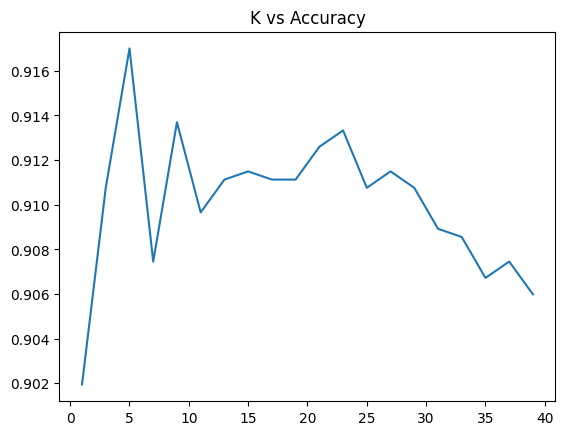

In [78]:
plt.plot(k,acc)
plt.title('K vs Accuracy')

Text(0.5, 1.0, 'K vs Error')

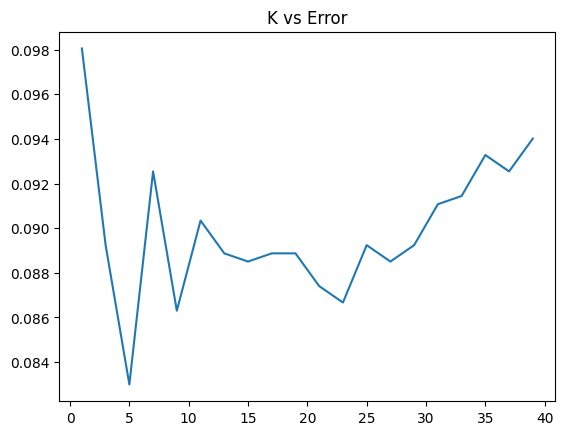

In [79]:
plt.plot(k,err)
plt.title('K vs Error')

In [80]:
# Generalized accuracy score method2:-
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.2,random_state=10,stratify=y_train)
k=[]
acc_cv=[]
err_cv=[]
for n in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    model=knn.fit(x_trainf,y_trainf)
    predicted=model.predict(x_cv)

    k.append(n)
    acc_cv.append(accuracy_score(y_cv,predicted))
    err_cv.append(1-accuracy_score(y_cv,predicted))

Text(0.5, 1.0, 'K vs Accuracy_cv')

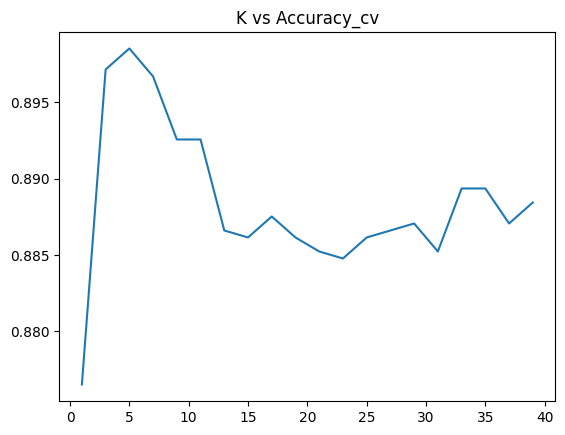

In [81]:
plt.plot(k,acc_cv)
plt.title('K vs Accuracy_cv')

Text(0.5, 1.0, 'K vs Error_cv')

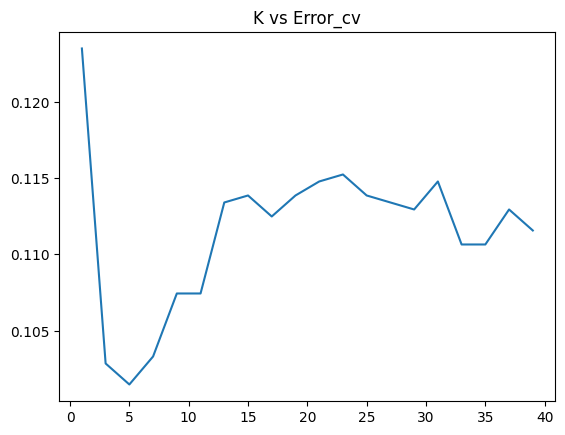

In [82]:
plt.plot(k,err_cv)
plt.title('K vs Error_cv')

In [ ]:
k1=[]
tr_err=[]
cv_err=[]

for k in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    model=knn.fit(x_trainf,y_trainf)
    pred_t=model.predict(x_trainf)
    pred_cv=model.predict(x_cv)
    k1.append(k)
    tr_err.append(1-accuracy_score(y_trainf,pred_t))
    cv_err.append(1-accuracy_score(y_cv,pred_cv))

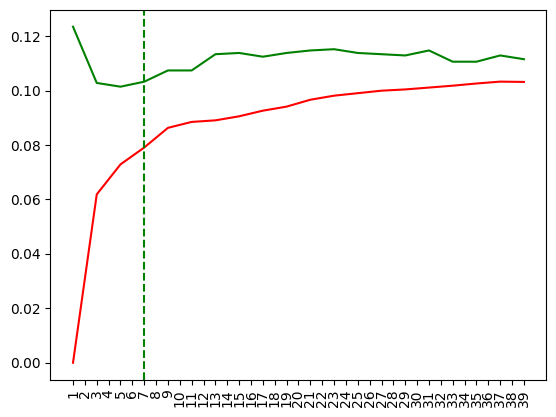

In [84]:
plt.plot(k1,tr_err,label='Training Error',color='r')
plt.plot(k1,cv_err,label='CV Error',color='g')
plt.xticks(rotation=90,ha='center')
plt.xticks(range(1,40))
plt.axvline(x=7,color='g',linestyle='--')

In [85]:
# KFOld:-
kf=KFold(n_splits=3)
k1=[]
f_acc=[]
for k in range(1,20,2):
    acc=[]
    for train_index,cv_index in kf.split(x_train):
        x_trainf,x_cv,y_trainf,y_cv=x_train.iloc[train_index],x_train.iloc[cv_index],y_train.iloc[train_index],y_train.iloc[cv_index]
        knn=KNeighborsClassifier(n_neighbors=k)
        model=knn.fit(x_trainf,y_trainf)
        predicted=model.predict(x_cv)
        acc.append(accuracy_score(y_cv,predicted))
    f_acc.append(np.mean(np.array(acc)))
    k1.append(k)

In [86]:
final_acc=[]
k1=[]
for k in range(1,40,2):
    final_acc.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k),x_train,y_train,scoring='accuracy',cv=5)))
    k1.append(k)

In [87]:
final_acc

[0.8817053062887613,
 0.8975024390984636,
 0.9026457416694189,
 0.8994308981154934,
 0.8991552051183739,
 0.8981450197468905,
 0.8966756975526342,
 0.8983288010180731,
 0.8962160545615676,
 0.8961245646425418,
 0.8942874690024647,
 0.8941955994572188,
 0.8947466480059288,
 0.8945632885416573,
 0.8929101850762183,
 0.8918076661718872,
 0.8920831904462421,
 0.8922667608139692,
 0.8900625244384379,
 0.8906134464450746]

In [88]:
knn=KNeighborsClassifier(n_neighbors=211)
model=knn.fit(x_trainf,y_trainf)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

0.8905618802791039

In [89]:
knn=KNeighborsClassifier(n_neighbors=7)
model=knn.fit(x_trainf,y_trainf)
prediction=model.predict(x_test)
accuracy_score(y_test,prediction)

0.9085567388909291

# Changing Algorithms:-

In [90]:
# Brute Force:-
brutef=KNeighborsClassifier(n_neighbors=6,algorithm='brute')
model=brutef.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100


90.56188027910393

In [91]:
x_trainf.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
       'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3'],
      dtype='object')

In [92]:
x_test.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter',
       'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3'],
      dtype='object')

In [93]:
# KD-Tree:-
kdtree=KNeighborsClassifier(n_neighbors=7,algorithm='kd_tree')
model=kdtree.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

90.85567388909291

In [94]:
# BallTree:-
ballt=KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree')
model=ballt.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

90.85567388909291

In [95]:
# Auto:-
auto=KNeighborsClassifier(n_neighbors=7,algorithm='auto')
model=auto.fit(x_trainf,y_trainf)
predicted=model.predict(x_test)
accuracy_score(y_test,predicted)*100

90.85567388909291

In [96]:
from sklearn.datasets import make_classification,make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report

Confusion MAtrix:-

In [97]:
confusion_matrix(y_test,predicted)

array([[217,   1,  37,   0,   1,   2,   7],
       [  0, 104,   0,   0,   0,   0,   0],
       [ 17,   0, 297,   0,   8,   2,   2],
       [  0,   0,   0, 664,   2,  15,  28],
       [  2,   0,   6,   3, 362,   0,  13],
       [  1,   0,   0,   5,   0, 385,  15],
       [  3,   0,   0,  58,  12,   9, 445]])

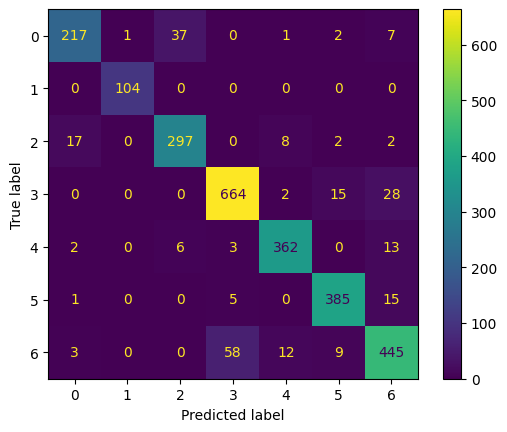

In [98]:
cm=ConfusionMatrixDisplay(confusion_matrix(y_test,predicted,labels=model.classes_))
cm.plot()
plt.show()

precision_score:-

In [99]:
precision_score(y_test,predicted,average=None)

array([0.90416667, 0.99047619, 0.87352941, 0.90958904, 0.94025974,
       0.93220339, 0.87254902])

In [100]:
precision_score(y_test,predicted,pos_label=None,average=None)

array([0.90416667, 0.99047619, 0.87352941, 0.90958904, 0.94025974,
       0.93220339, 0.87254902])

RecallScore:-

In [101]:
recall_score(y_test,predicted,average=None)

array([0.81886792, 1.        , 0.91104294, 0.93653032, 0.93782383,
       0.94827586, 0.84440228])

In [102]:
recall_score(y_test,predicted,pos_label=2,average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 2) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


array([0.81886792, 1.        , 0.91104294, 0.93653032, 0.93782383,
       0.94827586, 0.84440228])

f1_score:-

In [103]:
f1_score(y_test,predicted,average=None)

array([0.85940594, 0.99521531, 0.89189189, 0.9228631 , 0.93904021,
       0.94017094, 0.85824494])

In [104]:
f1_score(y_test,predicted,pos_label=0,average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


array([0.85940594, 0.99521531, 0.89189189, 0.9228631 , 0.93904021,
       0.94017094, 0.85824494])

In [105]:
y_prob=model.predict_proba(x_test)

Log_Loss:-

In [106]:
from sklearn.metrics import log_loss

In [107]:
log_loss(y_test,y_prob)

0.8888094813409914

In [108]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.82      0.86       265
      BOMBAY       0.99      1.00      1.00       104
        CALI       0.87      0.91      0.89       326
    DERMASON       0.91      0.94      0.92       709
       HOROZ       0.94      0.94      0.94       386
       SEKER       0.93      0.95      0.94       406
        SIRA       0.87      0.84      0.86       527

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



Dummy:-

In [109]:
from sklearn.dummy import DummyClassifier,DummyRegressor

In [110]:
dc=DummyClassifier()

In [111]:
dc_model=dc.fit(x_train,y_train)

In [112]:
dc_predict=dc_model.predict_proba(x_test)

In [113]:
log_loss(y_test,dc_predict)

1.834465155643503

In [114]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.82      0.86       265
      BOMBAY       0.99      1.00      1.00       104
        CALI       0.87      0.91      0.89       326
    DERMASON       0.91      0.94      0.92       709
       HOROZ       0.94      0.94      0.94       386
       SEKER       0.93      0.95      0.94       406
        SIRA       0.87      0.84      0.86       527

    accuracy                           0.91      2723
   macro avg       0.92      0.91      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [115]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=1,stratify=cv)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,test_size=0.1,stratify=y_train)

In [116]:
norm=MinMaxScaler()
x_trainf=norm.fit_transform(x_trainf)
x_cv=norm.transform(x_cv)
x_test=norm.transform(x_test)

In [117]:
dm=DummyClassifier()
model=dm.fit(x_trainf,y_trainf)
pred=model.predict_proba(x_cv)
log_loss(y_cv,pred)

1.8345982913731669

K is 1
Accuracy Score is 0.8787878787878788
Precision Score [0.85981308 1.         0.9047619  0.87096774 0.95394737 0.86549708
 0.81603774]
Recall Score [0.86792453 1.         0.87692308 0.8556338  0.94155844 0.91358025
 0.81990521]
F1 Score [0.86384977 1.         0.890625   0.86323268 0.94771242 0.88888889
 0.8179669 ]
Log Loss 4.368927683529353
              precision    recall  f1-score   support

    BARBUNYA       0.86      0.87      0.86       106
      BOMBAY       1.00      1.00      1.00        42
        CALI       0.90      0.88      0.89       130
    DERMASON       0.87      0.86      0.86       284
       HOROZ       0.95      0.94      0.95       154
       SEKER       0.87      0.91      0.89       162
        SIRA       0.82      0.82      0.82       211

    accuracy                           0.88      1089
   macro avg       0.90      0.90      0.90      1089
weighted avg       0.88      0.88      0.88      1089

K is 3
Accuracy Score is 0.9026629935720845
Precision 

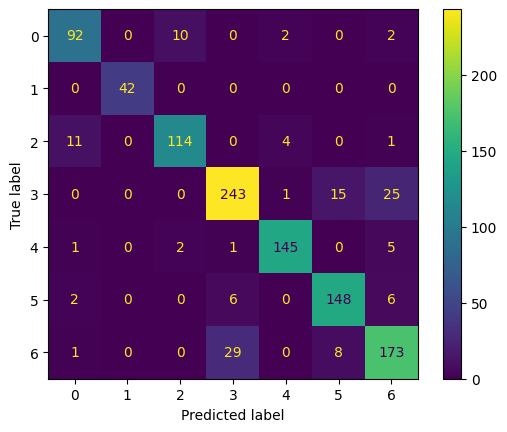

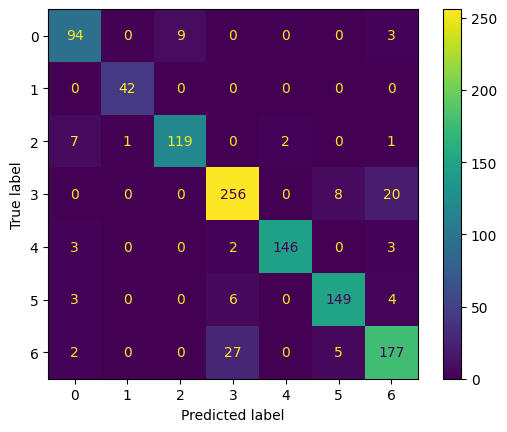

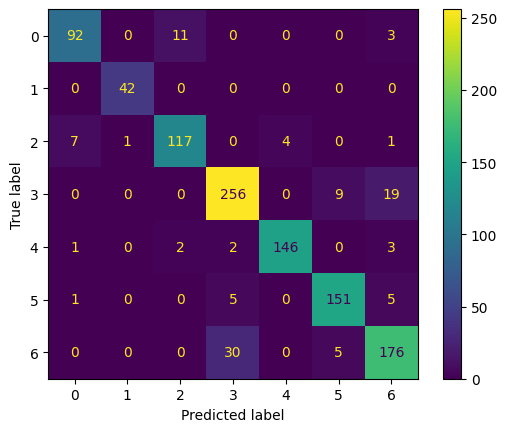

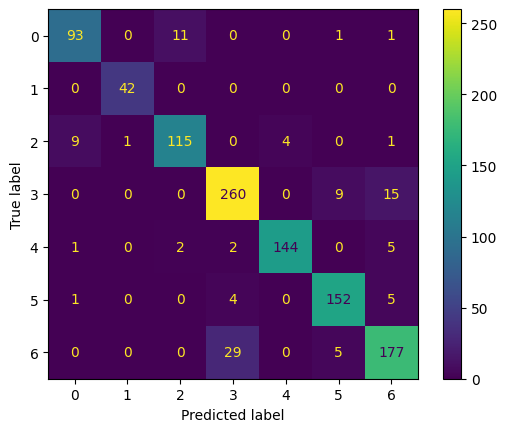

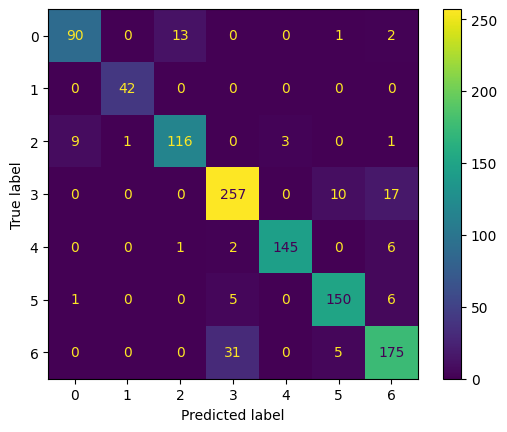

In [122]:
for i in range(1,10,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  model=knn.fit(x_trainf,y_trainf)
  y_pred=model.predict(x_cv)
  y_prob=model.predict_proba(x_cv)
  print('K is',i)
  print('Accuracy Score is',accuracy_score(y_cv,y_pred))
  cm=ConfusionMatrixDisplay(confusion_matrix(y_cv,y_pred))
  cm.plot()
  print('Precision Score',precision_score(y_cv,y_pred,average=None))
  print('Recall Score',recall_score(y_cv,y_pred,average=None))
  print('F1 Score',f1_score(y_cv,y_pred,average=None))
  print('Log Loss',log_loss(y_cv,y_prob))
  print(classification_report(y_cv,y_pred))